In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import warnings





In [2]:
warnings.filterwarnings("ignore")  # 避免显示FutureWorning

boston = load_boston()
x = boston['data']  # 特征信息
y = boston['target']  # 房价
feature_names = boston['feature_names']  # 影响因素
boston_data = pd.DataFrame(x, columns=feature_names)  # 特征信息和影响因素
boston_data['price'] = y  # 添加价格列表
'''
for i in range(13):
    plt.figure(figsize=(10, 7))
    plt.scatter(x[:,i],y,s=2)#某影响因素的特征信息与房价
    plt.title(feature_names[i])
plt.show()'''
cor = boston_data.corr()['price']  # 求取相关系数
print(cor)
# 取相关系数大于0.5的特征值 RM LSTAT PTRATIO price

boston_data = boston_data[['LSTAT', 'PTRATIO', 'RM', 'price']]  # 保留该四组因素
y = np.array(boston_data['price'])
feature_names = ['LSTAT', 'PTRATIO', 'RM', 'price']
'''
for i in range(3):
    x = np.array(boston_data[feature_names[i]])
    var = np.var(x,ddof=1)
    cov = np.cov(x,y)[0][1]
    k = cov/var
    b = np.mean(y) - k*np.mean(x)
    y_price = k*x + b
    plt.plot(x,y,'b.')
    plt.plot(x,y_price,'k-')
    plt.show()'''

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64


"\nfor i in range(3):\n    x = np.array(boston_data[feature_names[i]])\n    var = np.var(x,ddof=1)\n    cov = np.cov(x,y)[0][1]\n    k = cov/var\n    b = np.mean(y) - k*np.mean(x)\n    y_price = k*x + b\n    plt.plot(x,y,'b.')\n    plt.plot(x,y_price,'k-')\n    plt.show()"

     one  LSTAT  PTRATIO     RM  price
0      1   4.98     15.3  6.575   24.0
1      1   9.14     17.8  6.421   21.6
2      1   4.03     17.8  7.185   34.7
3      1   2.94     18.7  6.998   33.4
4      1   5.33     18.7  7.147   36.2
..   ...    ...      ...    ...    ...
501    1   9.67     21.0  6.593   22.4
502    1   9.08     21.0  6.120   20.6
503    1   5.64     21.0  6.976   23.9
504    1   6.48     21.0  6.794   22.0
505    1   7.88     21.0  6.030   11.9

[506 rows x 5 columns]
[[-7.08766379e-13]
 [ 7.41073869e-15]
 [ 3.09752224e-14]
 [ 1.12354570e-13]
 [ 1.00000000e+00]]


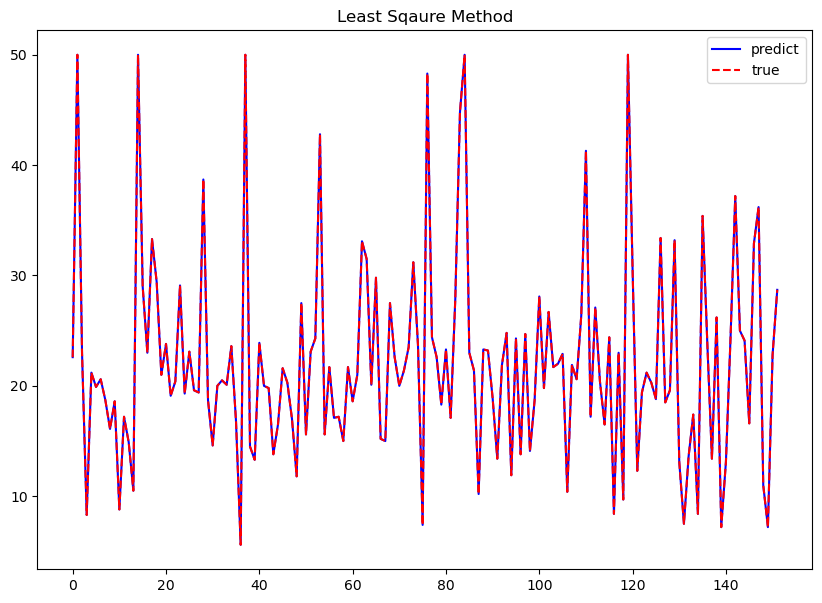

In [3]:
boston_data.insert(loc=0, column='one', value=1)
print(boston_data)
x = np.array(boston_data)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)  # 分割训练集和测试集
xT = x.T
x_mat = np.mat(train_x)
y_mat = np.mat(train_y).T
xT = x_mat.T
B = (xT * x_mat).I * xT * y_mat
print(B)
y_predict = test_x * B
plt2 = plt.figure(figsize=(10, 7))
plt2 = plt.plot(y_predict, 'b-')
plt2 = plt.plot(test_y, 'r--')
plt2 = plt.legend(['predict', 'true'])
plt2 = plt.title('Least Sqaure Method')
plt.show()
# [[22.17686885]
# [-0.55760828]
# [-1.11165635]
# [ 4.44512502]]